# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis



In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
cwd = "/Users/stella/Downloads/BritishAirways/BA/task 2/"

In [3]:
df = pd.read_csv(cwd + "data_t2/customer_booking.csv",  encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [5]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [6]:
def calculate_and_print_statistics(df):
    """
    Calculates and prints statistics based on the given DataFrame.

    Args:
        df (pandas.DataFrame): The DataFrame containing the required columns.

    Returns:
        None
    """
    
    
    # Calculate and print percentages of bookings made through different sales channels
    per_internet = df.sales_channel.value_counts().values[0] / df.sales_channel.count() * 100
    per_mobile = df.sales_channel.value_counts().values[1] / df.sales_channel.count() * 100
    
    print("___________________________________________")

    print(f"Number of bookings done through internet: {per_internet} %")
    print(f"Number of bookings done through phone call: {per_mobile} %")


    # Calculate and print percentages of different trip types
    per_round = df.trip_type.value_counts().values[0] / df.trip_type.count() * 100
    per_oneway = df.trip_type.value_counts().values[1] / df.trip_type.count() * 100
    per_circle = df.trip_type.value_counts().values[2] / df.trip_type.count() * 100
    
    print("___________________________________________")

    print(f"Percentage of round trips: {per_round} %")
    print(f"Percentage of One-way trips: {per_oneway} %")
    print(f"Percentage of circle trips: {per_circle} %")



### Sales Channel  & Trip type

In [7]:
calculate_and_print_statistics(df)

___________________________________________
Number of bookings done through internet: 88.764 %
Number of bookings done through phone call: 11.236 %
___________________________________________
Percentage of round trips: 98.994 %
Percentage of One-way trips: 0.774 %
Percentage of circle trips: 0.232 %


Majority of the bookings for the flights are done online, compared to on the phone.

Additionally, majority of the trips booked were round trips.



#### Purchase Lead

<AxesSubplot:xlabel='purchase_lead', ylabel='Count'>

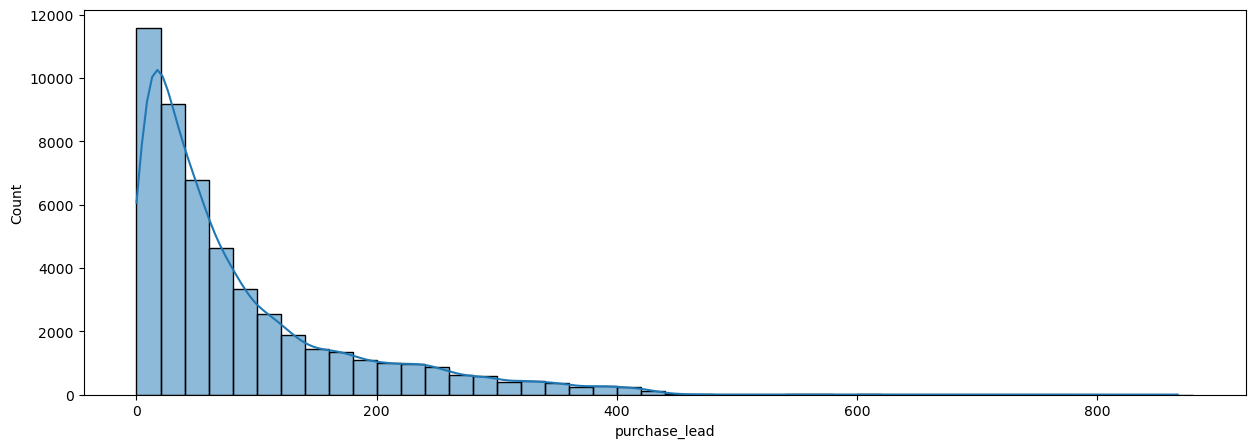

In [8]:
plt.figure(figsize=(15,5))
sns.histplot(data=df, x="purchase_lead", binwidth=20,kde=True)

In [9]:
(df.purchase_lead >600).value_counts()

False    49992
True         8
Name: purchase_lead, dtype: int64

In [10]:
df[df.purchase_lead > 600]

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
835,3,Internet,RoundTrip,641,46,6,Sun,AKLKUL,Malaysia,1,0,1,8.83,1
6148,1,Internet,RoundTrip,614,19,11,Wed,COKMEL,Australia,0,0,0,8.83,0
24119,1,Internet,RoundTrip,704,23,8,Tue,PNHSYD,Australia,0,0,0,8.58,0
38356,2,Internet,RoundTrip,633,5,10,Sat,HKTOOL,Australia,0,0,1,8.83,0
39417,1,Mobile,RoundTrip,625,5,15,Fri,ICNRGN,Myanmar (Burma),0,0,0,6.62,0
42916,1,Mobile,RoundTrip,605,6,18,Thu,BLRMEL,India,0,0,0,8.83,0
46716,2,Internet,RoundTrip,606,6,6,Fri,HKTTPE,United States,0,0,1,4.67,0
48259,3,Internet,RoundTrip,867,6,7,Mon,KIXMLE,Japan,0,0,1,7.00,1


In [11]:
#filtering the data to have only purchase lead days less than 600 days
df = df[df.purchase_lead <600 ]

### Length of Stay

<AxesSubplot:xlabel='length_of_stay', ylabel='Count'>

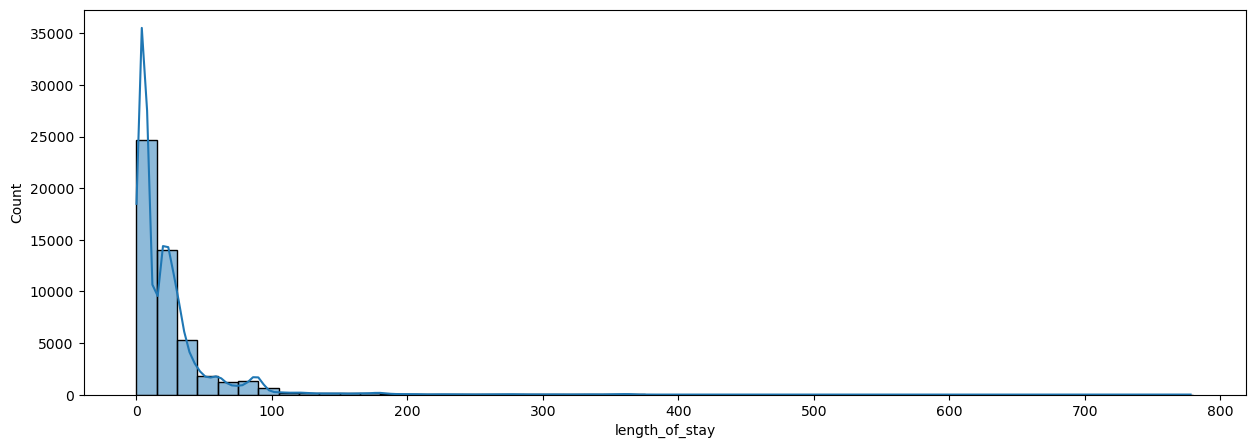

In [12]:
plt.figure(figsize=(15,5))
sns.histplot(data=df, x="length_of_stay", binwidth=15,kde=True)

In [13]:
(df.length_of_stay> 200).value_counts()

False    49713
True       279
Name: length_of_stay, dtype: int64

In [14]:
df[df.length_of_stay> 500].booking_complete.value_counts()

0    9
1    1
Name: booking_complete, dtype: int64

In [15]:
#filtering the data to have only length of stay days less than 500 days
df = df[df.purchase_lead <500 ]

### Flight Day

In [16]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [17]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [18]:
df["flight_day"].value_counts()

1    8100
3    7671
2    7670
4    7423
5    6759
7    6550
6    5809
Name: flight_day, dtype: int64

### Booking Origin

Text(0, 0.5, 'Number of bookings')

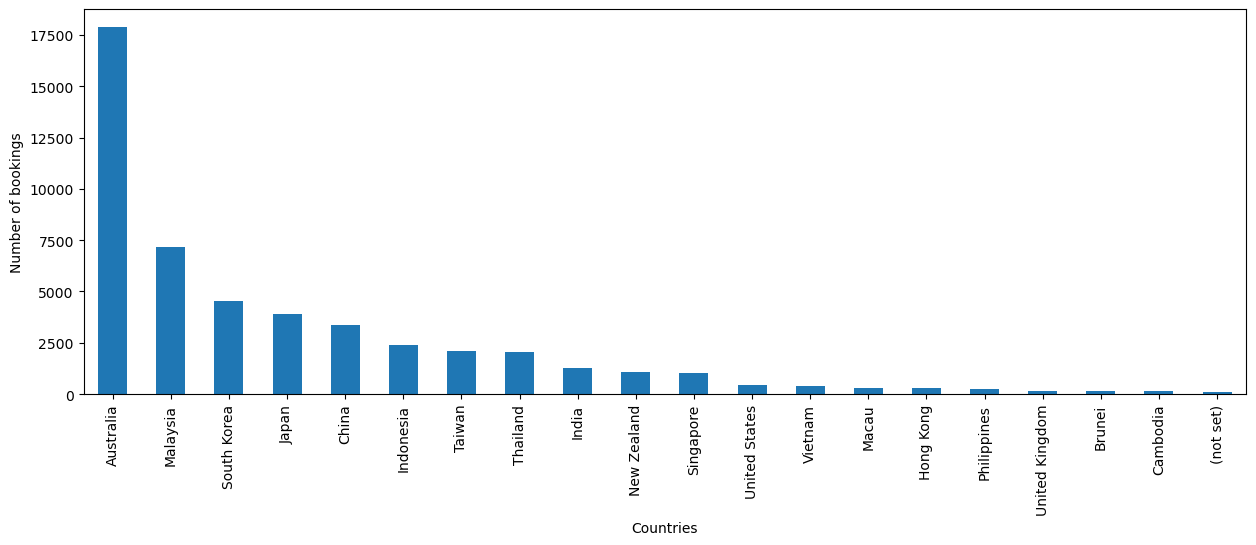

In [19]:
plt.figure(figsize=(15,5))
ax = df.booking_origin.value_counts()[:20].plot(kind="bar")
ax.set_xlabel("Countries")
ax.set_ylabel("Number of bookings")

Text(0, 0.5, 'Number of complete bookings')

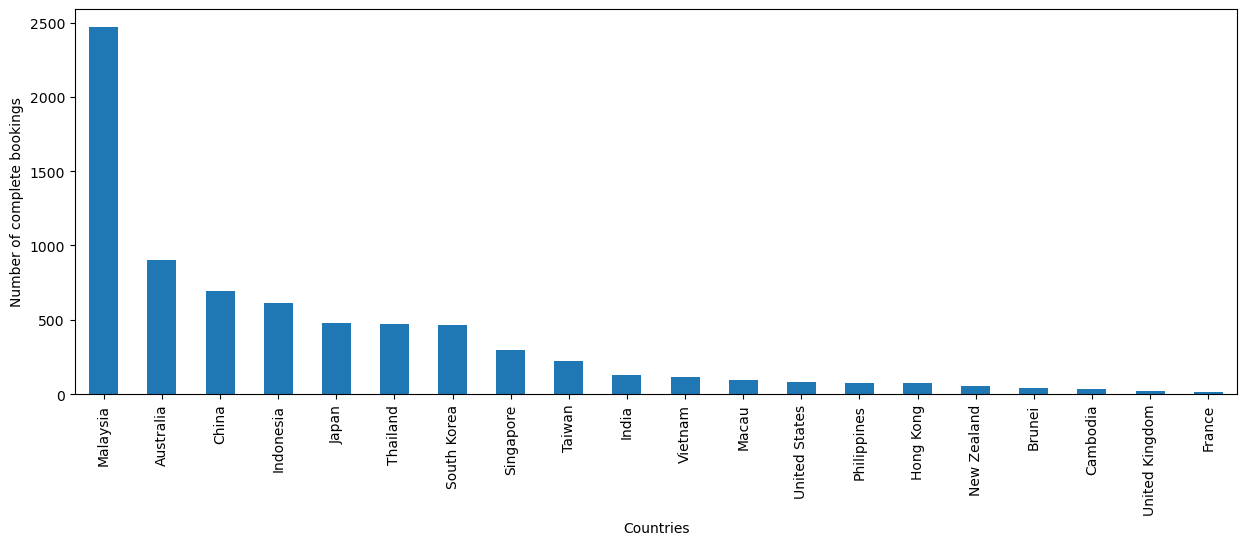

In [20]:
plt.figure(figsize=(15,5))
ax = df[df.booking_complete ==1].booking_origin.value_counts()[:20].plot(kind="bar")
ax.set_xlabel("Countries")
ax.set_ylabel("Number of complete bookings")

### Booking Completion

In [21]:
success_booking_per = df.booking_complete.value_counts().values[0] / len(df) * 100
unsuccess_booking_per = 100-success_booking_per
print(f"Out of 50000 booking entries only {round(unsuccess_booking_per,2)} % bookings were successfull or complete.")

Out of 50000 booking entries only 14.96 % bookings were successfull or complete.


In [22]:
# Export the dataset to a new csv file

df.to_csv(cwd + "data_t2/filtered_customer_booking.csv")
